In [1]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

D:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2113536/2110848 [==============================] - 9s 4us/step


In [5]:
train_data[0]
train_labels[0] # a topic index

# decode a newswires back to text
word_index=reuters.get_word_index()
reversed_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reversed_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
# encode the data
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

# one-hot encode the labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [7]:
# build model
from keras import models
from keras import layers
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile('rmsprop','categorical_crossentropy',['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 241us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 212us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 188us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 188us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


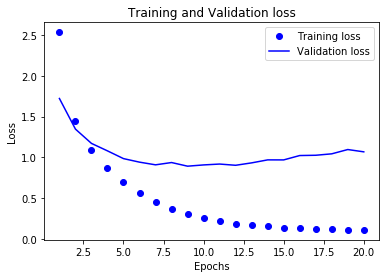

In [9]:
# plot the training and validation loss
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

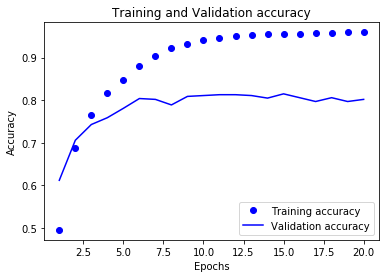

In [10]:
# plot training and validation accuracy
plt.clf() # clean figure

acc=history.history['acc']
val_acc=history.history['val_acc']

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile('rmsprop','categorical_crossentropy',['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 221us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 215us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 192us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 192us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 201us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 2s 191us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

[1.022207977935234, 0.7756010686194165]

In [14]:
# generate predictions on new data
predictions=model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

3

In [15]:
# encode the labels as integer arrays
y_train=np.array(train_labels)
y_test=np.array(test_labels)
model.compile('rmsprop','sparse_categorical_crossentropy',['acc'])
model.fit(x_train,y_train,epochs=9,batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/9
8982/8982 [==============================] - 2s 193us/step - loss: 0.3328 - acc: 0.9257
Epoch 2/9
8982/8982 [==============================] - 2s 170us/step - loss: 0.2402 - acc: 0.9412
Epoch 3/9
8982/8982 [==============================] - 2s 169us/step - loss: 0.2079 - acc: 0.9457
Epoch 4/9
8982/8982 [==============================] - 2s 172us/step - loss: 0.1817 - acc: 0.9490
Epoch 5/9
8982/8982 [==============================] - 2s 178us/step - loss: 0.1646 - acc: 0.9503
Epoch 6/9
8982/8982 [==============================] - 2s 170us/step - loss: 0.1520 - acc: 0.9532
Epoch 7/9
8982/8982 [==============================] - 2s 170us/step - loss: 0.1447 - acc: 0.9536
Epoch 8/9
8982/8982 [==============================] - 2s 178us/step - loss: 0.1313 - acc: 0.9555
Epoch 9/9
2246/2246 [==============================] - 0s 194us/step


[1.1313820889456827, 0.7943009795191451]

In [19]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile('rmsprop','categorical_crossentropy',['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val,y_val))
model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 321us/step - loss: 2.9917 - acc: 0.3563 - val_loss: 2.3234 - val_acc: 0.4560
Epoch 2/9
7982/7982 [==============================] - 2s 280us/step - loss: 1.8007 - acc: 0.6057 - val_loss: 1.5944 - val_acc: 0.6740
Epoch 3/9
7982/7982 [==============================] - 2s 301us/step - loss: 1.3006 - acc: 0.7080 - val_loss: 1.4061 - val_acc: 0.6820
Epoch 4/9
7982/7982 [==============================] - 2s 264us/step - loss: 1.1236 - acc: 0.7258 - val_loss: 1.3723 - val_acc: 0.6890
Epoch 5/9
7982/7982 [==============================] - 2s 258us/step - loss: 1.0115 - acc: 0.7397 - val_loss: 1.3437 - val_acc: 0.6960
Epoch 6/9
7982/7982 [==============================] - 2s 263us/step - loss: 0.9235 - acc: 0.7553 - val_loss: 1.3474 - val_acc: 0.6980
Epoch 7/9
7982/7982 [==============================] - 2s 283us/step - loss: 0.8497 - acc: 0.7680 - val_loss: 1.3567 - val_acc: 0.7060
Epoch 8

[1.4182761454306219, 0.6878895815312597]

In [20]:
# larger layers
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile('rmsprop','categorical_crossentropy',['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val,y_val))
model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 447us/step - loss: 1.6041 - acc: 0.6649 - val_loss: 1.1490 - val_acc: 0.7450
Epoch 2/9
7982/7982 [==============================] - 3s 403us/step - loss: 0.7874 - acc: 0.8255 - val_loss: 0.9214 - val_acc: 0.7970
Epoch 3/9
7982/7982 [==============================] - 3s 417us/step - loss: 0.4758 - acc: 0.9004 - val_loss: 0.8872 - val_acc: 0.8290
Epoch 4/9
7982/7982 [==============================] - 3s 412us/step - loss: 0.3137 - acc: 0.9331 - val_loss: 0.9188 - val_acc: 0.7930
Epoch 5/9
7982/7982 [==============================] - 3s 421us/step - loss: 0.2308 - acc: 0.9474 - val_loss: 0.8845 - val_acc: 0.8210
Epoch 6/9
7982/7982 [==============================] - 4s 538us/step - loss: 0.1925 - acc: 0.9491 - val_loss: 0.9325 - val_acc: 0.8150
Epoch 7/9
7982/7982 [==============================] - 4s 470us/step - loss: 0.1673 - acc: 0.9539 - val_loss: 0.9541 - val_acc: 0.8120
Epoch 8

[1.2224167981321856, 0.7845057880676759]

In [21]:
# more hidden layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile('rmsprop','categorical_crossentropy',['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val,y_val))
model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 340us/step - loss: 1.7549 - acc: 0.6270 - val_loss: 1.2548 - val_acc: 0.7070
Epoch 2/9
7982/7982 [==============================] - 2s 295us/step - loss: 0.9713 - acc: 0.7780 - val_loss: 1.0380 - val_acc: 0.7720
Epoch 3/9
7982/7982 [==============================] - 3s 321us/step - loss: 0.6638 - acc: 0.8523 - val_loss: 0.9768 - val_acc: 0.7910
Epoch 4/9
7982/7982 [==============================] - 2s 297us/step - loss: 0.4578 - acc: 0.8994 - val_loss: 0.9979 - val_acc: 0.7990
Epoch 5/9
7982/7982 [==============================] - 2s 282us/step - loss: 0.3242 - acc: 0.9286 - val_loss: 0.9247 - val_acc: 0.8240
Epoch 6/9
7982/7982 [==============================] - 2s 286us/step - loss: 0.2468 - acc: 0.9429 - val_loss: 0.9738 - val_acc: 0.8190
Epoch 7/9
7982/7982 [==============================] - 2s 303us/step - loss: 0.2076 - acc: 0.9483 - val_loss: 1.0473 - val_acc: 0.8090
Epoch 8

[1.2872986233032715, 0.7756010686194165]